# IMDB 리뷰 감성 분류하기(IMDB Movie Review Sentiment Analysis)
* 해당 리뷰가 긍정인 경우 1을 부정인 경우 0으로 표시한 레이블로 구성된 데이터
* GRU를 이용한 이진분류 수행

### Data Load & Preprocessing

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import imdb

In [2]:
# 영화 리뷰는 X_train에, 감성 정보는 y_train에 저장
# 테스트용 리뷰는 X_test에, 테스트용 리뷰의 감성 정보는 y_test에 저장
(X_train, y_train), (X_test, y_test) = imdb.load_data()
# 등장 빈도 지정하여 제한하고 싶으면 아래 코드 사용
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = max(y_train) + 1
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


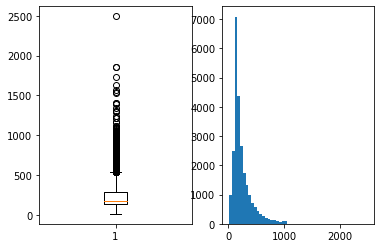

In [4]:
# 리뷰 길이 분포 시각화
len_result = [len(s) for s in X_train]

print('리뷰의 최대 길이 : {}'.format(np.max(len_result)))
print('리뷰의 평균 길이 : {}'.format(np.mean(len_result)))

plt.subplot(1,2,1)
plt.boxplot(len_result)
plt.subplot(1,2,2)
plt.hist(len_result, bins=50)
plt.show()

In [5]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


* IMDB 리뷰 데이터셋에서는 0, 1, 2, 3은 특별 토큰
* 정수 4부터가 실제 IMDB 리뷰 데이터셋에서 빈도수가 가장 높은 실제 영단어

In [6]:
word_to_index = imdb.get_word_index()
index_to_word={}
for key, value in word_to_index.items():
    index_to_word[value+3] = key

1646592/1641221 [==============================] - 0s 0us/step


### GRU Model

In [7]:
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [8]:
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [9]:
max_len = 500
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [10]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

In [11]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [13]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
334/334 [==============================] - 263s 779ms/step - loss: 0.0538 - acc: 0.9820 - val_loss: 0.4371 - val_acc: 0.8776

Epoch 00001: val_acc did not improve from 0.90080
Epoch 2/15
334/334 [==============================] - 260s 780ms/step - loss: 0.0361 - acc: 0.9892 - val_loss: 0.5033 - val_acc: 0.8694

Epoch 00002: val_acc did not improve from 0.90080
Epoch 3/15
334/334 [==============================] - 261s 780ms/step - loss: 0.0267 - acc: 0.9923 - val_loss: 0.5003 - val_acc: 0.8554

Epoch 00003: val_acc did not improve from 0.90080
Epoch 4/15
334/334 [==============================] - 263s 787ms/step - loss: 0.0178 - acc: 0.9947 - val_loss: 0.6143 - val_acc: 0.8692

Epoch 00004: val_acc did not improve from 0.90080
Epoch 5/15
334/334 [==============================] - 264s 791ms/step - loss: 0.0099 - acc: 0.9969 - val_loss: 0.6506 - val_acc: 0.8792

Epoch 00005: val_acc did not improve from 0.90080
Epoch 00005: early stopping


In [14]:
loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))


782/782 [==============================] - 84s 107ms/step - loss: 0.2942 - acc: 0.8933

 테스트 정확도: 0.8933


### 임의의 문장에 대해 리뷰 긍/부정 예측 수행

In [15]:
# 입력된 문장에 대해서 기본적인 전처리와 정수 인코딩, 패딩을 한 후에 모델의 입력으로 사용하여 예측값을 리턴하는 함수
def sentiment_predict(new_sentence):
  # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
  new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()

  # 정수 인코딩
  encoded = []
  for word in new_sentence.split():
    # 단어 집합의 크기를 10,000으로 제한.
    try :
      if word_to_index[word] <= 10000:
        encoded.append(word_to_index[word]+3)
      else:
    # 10,000 이상의 숫자는 <unk> 토큰으로 취급.
        encoded.append(2)
    # 단어 집합에 없는 단어는 <unk> 토큰으로 취급.
    except KeyError:
      encoded.append(2)

  pad_new = pad_sequences([encoded], maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [16]:
# 영화 블랙팬서의 1점 리뷰로 테스트
temp_str = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

sentiment_predict(temp_str)

99.60% 확률로 부정 리뷰입니다.


In [17]:
# 영화 어벤져스의 10점 리뷰로 테스트
temp_str = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

sentiment_predict(temp_str)

98.89% 확률로 긍정 리뷰입니다.
